In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F


import os
import numpy as np
import math

from Stationary.core import *
from Stationary.utils import *

from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

import torch.nn.functional as F
import copy

from collections import defaultdict

np.random.seed(0)
torch.manual_seed(0)

In [103]:
test_family = 'NonLinearModel_NonLinearTask'
test_name = 'test6_nodecay'

In [104]:
import concurrent.futures
import multiprocessing as mp

from external import *

iterations = 20

if __name__ == '__main__':
  
    SEEDS = np.linspace(1, iterations, iterations, dtype=int).tolist()

    error_list = []
    score_list = []
    error_list_fedavg = []
    score_list_fedavg = []

    with concurrent.futures.ProcessPoolExecutor(max_workers=mp.cpu_count(), mp_context=mp.get_context("spawn")) as executor:
            for error, score, error_fedavg, score_fedavg in executor.map(single_iteration, SEEDS):
                error_list.append(error)
                score_list.append(score)
                error_list_fedavg.append(error_fedavg)
                score_list_fedavg.append(score_fedavg)

In [105]:
err = []
err_std = []
for i in range(0, len(error_list[0])):
    s = 0
    e = []
    for k in error_list:
        s += k[i]
        e.append(k[i])
    err.append(s / len(error_list))
    err_std.append(np.std(e))

sc = []
sc_std = []
for i in range(0, len(score_list[0])):
    s = 0
    e = []
    for k in score_list:
        s += k[i]
        e.append(k[i])
    sc.append(s / len(score_list))
    sc_std.append(np.std(e))

err_s = []
err_s_std = []
for i in range(0, len(error_list_fedavg[0])):
    s = 0
    e = []
    for k in error_list_fedavg:
        s += k[i]
        e.append(k[i])
    err_s.append(s / len(error_list_fedavg))
    err_s_std.append(np.std(e))

sc_s = []
sc_s_std = []
for i in range(0, len(score_list_fedavg[0])):
    s = 0
    e = []
    for k in score_list_fedavg:
        s += k[i]
        e.append(k[i])
    sc_s.append(s / len(score_list_fedavg))
    sc_s_std.append(np.std(e))

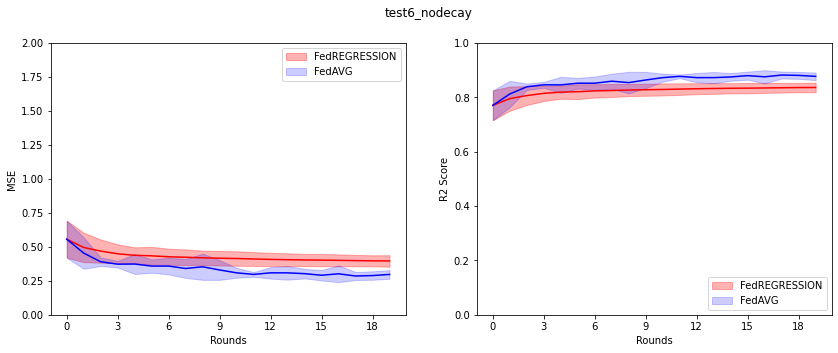

In [106]:
from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator

#plt.figure(figsize=(20,5))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
fig.suptitle(test_name)


x = np.arange(len(error_list[0]))

ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))


ax1.fill_between(x, np.array(err)+np.array(err_std), np.array(err)-np.array(err_std), color='red', label='FedREGRESSION', alpha=0.3)
ax1.fill_between(x, np.array(err_s)+np.array(err_s_std), np.array(err_s)-np.array(err_s_std), color='blue', label='FedAVG', alpha=0.2)
ax1.plot(x, err, color='red')
ax1.plot(x, err_s, color='blue')

ax1.legend(loc='upper right')

ax1.set_xlabel("Rounds")
ax1.set_ylabel("MSE")


ax1.set_ylim(ymin=0, ymax=2)


ax2.fill_between(x, np.array(sc)+np.array(sc_std), np.array(sc)-np.array(sc_std), color='red', label='FedREGRESSION', alpha=0.3)
ax2.fill_between(x, np.array(sc_s)+np.array(sc_s_std), np.array(sc_s)-np.array(sc_s_std), color='blue', label='FedAVG', alpha=0.2)
ax2.plot(x, sc, color='red')
ax2.plot(x, sc_s, color='blue')
ax2.legend(loc='lower right')

ax2.set_xlabel("Rounds")
ax2.set_ylabel("R2 Score")

ax2.set_ylim(ymin=0, ymax=1)




plt.draw()

plt.savefig("Results/"+test_family+"/plots/"+test_name+".svg")

In [107]:
import pandas as pd


d = {'Error_FedREG': err, 
     'Error_FedREG_std': err_std,
     'Score_FedREG': sc, 
     'Score_FedREG_std': sc_std,
     'Error_FedAVG': err_s, 
     'Error_FedAVG_std': err_s_std,
     'Score_FedAVG': sc_s, 
     'Score_FedAVG_std': sc_s_std}

df = pd.DataFrame(data=d)

df.to_csv("Results/"+test_family+"/data/"+test_name+".csv", index=False)

In [108]:
pd.read_csv("Results/"+test_family+"/data/"+test_name+".csv")

,Error_FedREG,Error_FedREG_std,Score_FedREG,Score_FedREG_std,Error_FedAVG,Error_FedAVG_std,Score_FedAVG,Score_FedAVG_std
0,0.556197,0.135875,0.770639,0.054852,0.556197,0.135875,0.770639,0.054852
1,0.495579,0.108337,0.795497,0.044391,0.454044,0.115444,0.812497,0.048402
2,0.468734,0.085128,0.806612,0.034563,0.390371,0.031093,0.838944,0.011799
3,0.448796,0.069538,0.814806,0.028296,0.372510,0.024680,0.846202,0.010792
4,0.437908,0.058769,0.819251,0.024259,0.373494,0.073406,0.845923,0.029677
5,0.433906,0.065589,0.820895,0.027111,0.358587,0.049024,0.852062,0.019622
6,0.426887,0.059297,0.823781,0.024616,0.358469,0.060936,0.852107,0.024655
7,0.423510,0.057677,0.825173,0.023944,0.340848,0.069454,0.859456,0.027648
8,0.419271,0.052820,0.826912,0.022049,0.353313,0.096231,0.854227,0.039721
9,0.416392,0.053331,0.828103,0.022223,0.329902,0.072710,0.863913,0.029797
